<a href="https://colab.research.google.com/github/davidias0090/validation_and_metrics/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [1]:
#Importação das bibliotecas para carregar a base de dados
import pandas as pd
url ='https://raw.githubusercontent.com/davidias0090/validation_and_metrics/main/diabetes%20-%20diabetes.csv.csv'
df = pd.read_csv(url)
df.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,167.000,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,248.000,1
3,70,45,543,30.5,158.000,1
4,60,23,846,30.1,398.000,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   glicemia              394 non-null    int64  
 1   pressao_sanguinea     394 non-null    int64  
 2   dobra_cutane_triceps  394 non-null    int64  
 3   insulina              394 non-null    float64
 4   imc                   394 non-null    float64
 5   diabetes              394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


In [5]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [6]:
#separar dados de treino e teste
from sklearn.model_selection import train_test_split
seed = 5
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=seed, stratify=y)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [14]:
#criar modelo de arvore de decisao
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5, random_state = seed)
#treinar modelo
dtree.fit(x_treino, y_treino)
#calculando acuracia
acuracia = dtree.score(x_teste, y_teste)
print(f'Acuracia do modelo DecisionTreeClassifier: {acuracia:.2%}%')

Acuracia do modelo DecisionTreeClassifier: 65.66%%


In [15]:
#Criando modelo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier(max_depth=5, random_state = seed)
#treinando modelo
r_forest.fit(x_treino, y_treino)
#calculando acuracia
acuracia = r_forest.score(x_teste, y_teste)
print(f'Acuracia do modelo RandomForestClassifier: {acuracia:.2%}%')

Acuracia do modelo RandomForestClassifier: 65.66%%


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

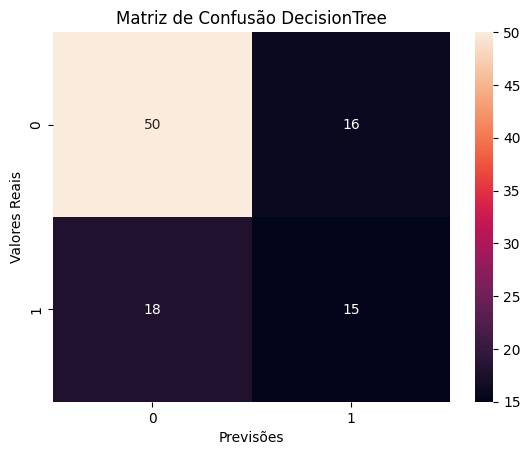

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = dtree.predict(x_teste)
matriz_dt = confusion_matrix(y_teste, y_pred)
#Plote a matriz de decisao
sns.heatmap(matriz_dt, annot=True, fmt='d')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão DecisionTree')
plt.show()

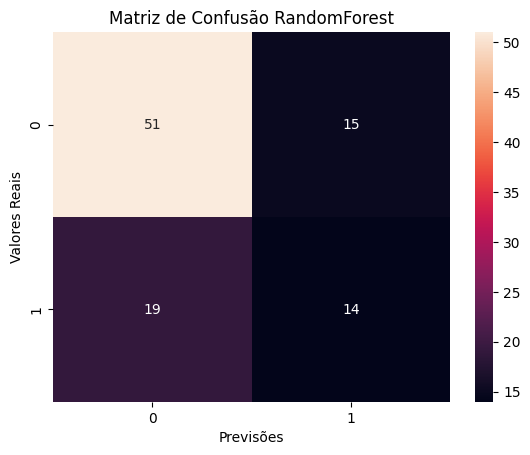

In [23]:
y_pred = r_forest.predict(x_teste)
matriz_rf = confusion_matrix(y_teste, y_pred)
#Plote a matriz de decisao
sns.heatmap(matriz_rf, annot=True, fmt='d')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão RandomForest')
plt.show()

### Desafio 5

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados

In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Decision Tree
y_pred_dt = dtree.predict(x_teste)
accuracy_dt = accuracy_score(y_teste, y_pred_dt)
recall_dt = recall_score(y_teste, y_pred_dt)
precision_dt = precision_score(y_teste, y_pred_dt)
f1_dt = f1_score(y_teste, y_pred_dt)

print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"F1-Score: {f1_dt:.2f}")

Decision Tree Metrics:
Accuracy: 0.66
Recall: 0.45
Precision: 0.48
F1-Score: 0.47


In [26]:
# Random Forest
y_pred_rf = r_forest.predict(x_teste)
accuracy_rf = accuracy_score(y_teste, y_pred_rf)
recall_rf = recall_score(y_teste, y_pred_rf)
precision_rf = precision_score(y_teste, y_pred_rf)
f1_rf = f1_score(y_teste, y_pred_rf)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")


Random Forest Metrics:
Accuracy: 0.66
Recall: 0.42
Precision: 0.48
F1-Score: 0.45


### Desafio 6

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

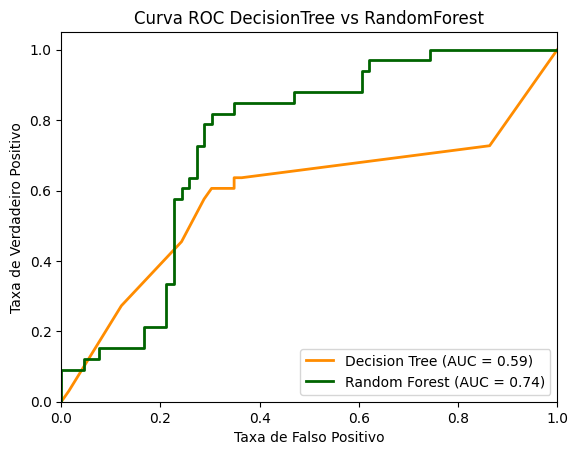

In [33]:
from sklearn.metrics import roc_curve, auc

# ROC e AUC DecisionTree
y_pred_proba_dt = dtree.predict_proba(x_teste)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_teste, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# ROC e AUC RandomForest
y_pred_proba_rf = r_forest.predict_proba(x_teste)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_teste, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotando as duas curvas no mesmo gráfico
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC DecisionTree vs RandomForest')
plt.legend(loc="lower right")
plt.show()


### Desafio 7

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

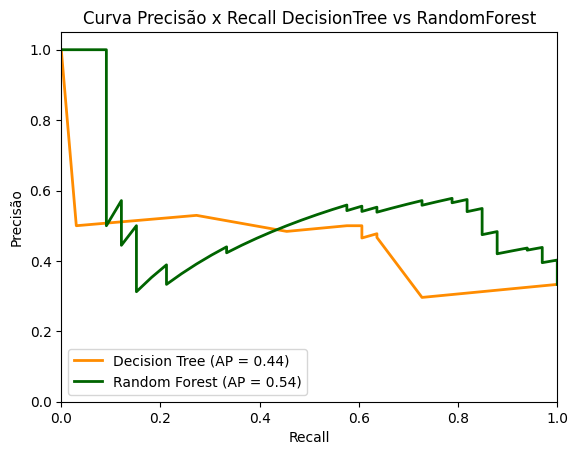

In [34]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precisão x Recall DecisionTree
precision_dt, recall_dt, _ = precision_recall_curve(y_teste, y_pred_proba_dt)
ap_dt = average_precision_score(y_teste, y_pred_proba_dt)

# Precisão x Recall RandomForest
precision_rf, recall_rf, _ = precision_recall_curve(y_teste, y_pred_proba_rf)
ap_rf = average_precision_score(y_teste, y_pred_proba_rf)

# Plotando as duas curvas no mesmo gráfico
plt.figure()
plt.plot(recall_dt, precision_dt, color='darkorange', lw=2, label='Decision Tree (AP = %0.2f)' % ap_dt)
plt.plot(recall_rf, precision_rf, color='darkgreen', lw=2, label='Random Forest (AP = %0.2f)' % ap_rf)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precisão x Recall DecisionTree vs RandomForest')
plt.legend(loc="lower left")
plt.show()


### Desafio 8

Gere os relatórios de métricas dos modelos de classificação gerados.

In [36]:
# prompt: Gere os relatórios de métricas dos modelos de classificação gerados.

from sklearn.metrics import classification_report

# Relatório Decision Tree
print("Decision Tree Report:")
print(classification_report(y_teste, y_pred_dt))

# Relatório Random Forest
print("Random Forest Report:")
print(classification_report(y_teste, y_pred_rf))

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        66
           1       0.48      0.45      0.47        33

    accuracy                           0.66        99
   macro avg       0.61      0.61      0.61        99
weighted avg       0.65      0.66      0.65        99

Random Forest Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        66
           1       0.48      0.42      0.45        33

    accuracy                           0.66        99
   macro avg       0.61      0.60      0.60        99
weighted avg       0.65      0.66      0.65        99



### Desafio 9

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [58]:
def intervalo_de_confianca(resultados, nome):

  media = resultados.mean()
  desvio = resultados.std()
  print(f"intervalo de Confiança {nome} : [{max(media - 2*desvio,0)}, {min(media + 2*desvio,1)}]")

In [59]:
from sklearn.model_selection import cross_val_score

#DecisionTree
resultados_cv = cross_val_score(dtree, x, y, cv=5)
intervalo_de_confianca(resultados_cv, "Decision Tree")


intervalo de Confiança Decision Tree : [0.5057477774018612, 0.7682541700178077]


In [60]:
#RandomForest
resultados_cv = cross_val_score(r_forest, x, y, cv=5)
intervalo_de_confianca(resultados_cv, "Random Forest")


intervalo de Confiança Random Forest : [0.6289127748586277, 0.7971177347161856]


### Desafio 10

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [62]:
#divisao dos dados de treino e validacao
from sklearn.model_selection import KFold, cross_validate
kf = KFold(n_splits=10, shuffle=True, random_state=seed)

#validacao cruzada DecisionTree
resultados = cross_validate(dtree, x, y, cv=kf, scoring='recall')
test_score_dt = resultados['test_score']

#validacao cruzada RandomForest
resultados = cross_validate(r_forest, x, y, cv=kf, scoring='recall')
test_score_rf = resultados['test_score']

In [63]:
intervalo_de_confianca(test_score_dt , "DecisionTree")

intervalo de Confiança DecisionTree : [0.08026964236245837, 0.756845203575917]


In [64]:
intervalo_de_confianca(test_score_rf, "Random Forest")

intervalo de Confiança Random Forest : [0.19213638622582874, 0.8097800470141339]


### Desafio 11

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [65]:
from sklearn.model_selection import StratifiedKFold

# Definir o número de folds e o random state
n_splits = 10
seed = 5

# Criar o objeto StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

In [66]:
# Avaliar o desempenho do DecisionTreeClassifier com cross_val_score e StratifiedKFold
resultados_dt = cross_val_score(dtree, x, y, cv=skf, scoring='f1')
intervalo_de_confianca(resultados_dt, "Decision Tree")

intervalo de Confiança Decision Tree : [0.2840497999805797, 0.7296356172265281]


In [67]:
# Avaliar o desempenho do RandomForestClassifier com cross_val_score e StratifiedKFold
resultados_rf = cross_val_score(r_forest, x, y, cv=skf, scoring='f1')
intervalo_de_confianca(resultados_rf, "Random Forest")

intervalo de Confiança Random Forest : [0.4101897602656123, 0.652206510130658]


### Desafio 12

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [68]:
from sklearn.model_selection import LeaveOneOut

# Criar o objeto LeaveOneOut
loo = LeaveOneOut()

# Avaliar o desempenho do DecisionTreeClassifier com cross_val_score e LeaveOneOut
resultados_dt = cross_val_score(dtree, x, y, cv=loo)
print(f"Média do Decision Tree com LeaveOneOut: {resultados_dt.mean():.2f}")

# Avaliar o desempenho do RandomForestClassifier com cross_val_score e LeaveOneOut
resultados_rf = cross_val_score(r_forest, x, y, cv=loo)
print(f"Média do Random Forest com LeaveOneOut: {resultados_rf.mean():.2f}")


Média do Decision Tree com LeaveOneOut: 0.63
Média do Random Forest com LeaveOneOut: 0.68


### Desafio 13

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

In [69]:
y.value_counts(normalize=True)

,proportion
diabetes,
0,0.670051
1,0.329949


In [71]:
print("É possivel notar que a proporção dos dados da variavel alvo do conjunto de dados de diabetes esta desbalanceada")

É possivel notar que a proporção dos dados da variavel alvo do conjunto de dados de diabetes esta desbalanceada


### Desafio 14

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [73]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Criar o objeto SMOTE
smote = SMOTE(random_state=seed)

# Criar o pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('dtree', dtree)
])

# Criar o objeto StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

# Avaliar o desempenho do modelo com cross_val_score e StratifiedKFold
resultados = cross_val_score(pipeline, x, y, cv=skf, scoring='f1')

# Imprimir a média do F1-Score
print(f"Média do F1-Score com SMOTE e StratifiedKFold: {resultados.mean():.2f}")


Média do F1-Score com SMOTE e StratifiedKFold: 0.54


In [74]:
# Criar o pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('r_forest', r_forest)
])

# Criar o objeto StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

# Avaliar o desempenho do modelo com cross_val_score e StratifiedKFold
resultados = cross_val_score(pipeline, x, y, cv=skf, scoring='f1')

# Imprimir a média do F1-Score
print(f"Média do F1-Score com SMOTE e StratifiedKFold: {resultados.mean():.2f}")

Média do F1-Score com SMOTE e StratifiedKFold: 0.61


### Desafio 15

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [76]:
from imblearn.under_sampling import NearMiss

# Criar o objeto NearMiss
nearmiss = NearMiss(version=3)

# Criar o pipeline para Decision Tree
pipeline_dt = Pipeline([
    ('nearmiss', nearmiss),
    ('dtree', dtree)
])

# Criar o objeto StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

# Avaliar o desempenho do modelo com cross_val_score e StratifiedKFold
resultados_dt = cross_val_score(pipeline_dt, x, y, cv=skf, scoring='f1')

# Imprimir a média do F1-Score
print(f"Média do F1-Score com NearMiss e StratifiedKFold Decision Tree: {resultados_dt.mean():.2f}")


Média do F1-Score com NearMiss (versão 3) e StratifiedKFold (Decision Tree): 0.52


In [78]:
# Criar o pipeline para Random Forest
pipeline_rf = Pipeline([
    ('nearmiss', nearmiss),
    ('r_forest', r_forest)
])

# Avaliar o desempenho do modelo com cross_val_score e StratifiedKFold
resultados_rf = cross_val_score(pipeline_rf, x, y, cv=skf, scoring='f1')

# Imprimir a média do F1-Score
print(f"Média do F1-Score com NearMiss e StratifiedKFold Random Forest: {resultados_rf.mean():.2f}")


Média do F1-Score com NearMiss e StratifiedKFold Random Forest: 0.57


### Desafio 16

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

In [79]:
print("O modelo que obteve o melhor desempenho foi o Random Forest com SMOTE")

# Treinar o modelo com o pipeline
pipeline_rf.fit(x_treino, y_treino)

# Fazer previsões nos dados de teste
y_pred_rf = pipeline_rf.predict(x_teste)

# Avaliar o desempenho do modelo nos dados de teste
accuracy_rf = accuracy_score(y_teste, y_pred_rf)
recall_rf = recall_score(y_teste, y_pred_rf)
precision_rf = precision_score(y_teste, y_pred_rf)
f1_rf = f1_score(y_teste, y_pred_rf)

print("Random Forest com SMOTE - Resultados nos dados de teste:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")


O modelo que obteve o melhor desempenho foi o Random Forest com SMOTE
Random Forest com SMOTE - Resultados nos dados de teste:
Accuracy: 0.65
Recall: 0.64
Precision: 0.48
F1-Score: 0.55
